Imports 

In [1]:
import argparse, yaml
from experiments.base_experiment import BaseExperiment
import numpy as np
from matplotlib import pyplot as plt

ExperimentFactory calss 

In [2]:
class ExperimentFactory:
    @staticmethod
    def create_experiment(config) -> BaseExperiment:
        # create and return the corresponding experiment instance based on config
        experiment_type = config['experiment']['type']
        if experiment_type == 'gaussian_classification':
            from experiments.gaussian_classification_experiment import GaussianClassificationExperiment
            return GaussianClassificationExperiment(config)
        elif experiment_type == 'mnist_classification':
            from experiments.mnist_classification_experiment import MnistClassificationExperiment
            return MnistClassificationExperiment(config)
        else:
            raise ValueError(f"Unknown experiment type: {experiment_type}")

Reading the config file and creating the experiment instance 

In [ ]:
config_path = "configs/gaussian_config.yaml"

with open(config_path, 'r') as f:
    config = yaml.safe_load(f)
    
exp = ExperimentFactory.create_experiment(config)

Using NVIDIA GeForce RTX 4090 for evaluation.
Created the model: MLP(
  (net): Sequential(
    (0): Linear(in_features=784, out_features=2, bias=False)
    (1): LeakyReLU(negative_slope=0.1)
  )
)
Loaded test dataset with 1800 samples from Mnist dataset.
Created test DataLoader.
Initializing MnistClassificationExperiment completed.


/workspaces/DOC/core/dataset.py:52: UserWarning: The given buffer is not writable, and PyTorch does not support non-writable tensors. This means you can write to the underlying (supposedly non-writable) buffer using the tensor. You may want to copy the buffer to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /opt/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:1581.)
  labels = torch.frombuffer(lbpath.read(), dtype=torch.uint8).long()


**Synthetic Gaussian and MNIST datasets**

***DOC & True error distribution***

Estimating classifier density D(E) with 1000000 trials.


100%|██████████| 1000000/1000000 [06:05<00:00, 2734.06it/s]


Estimating classifier density completed.


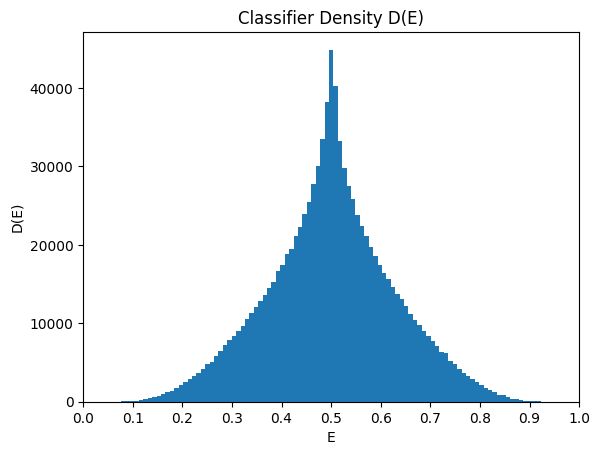

In [4]:
# ---------------------------------------------
# 1) Estimate classifier density D(E) (left plot)
# ---------------------------------------------
exp.logger.log(f"Estimating classifier density D(E) with {exp.doc_config['n_trials']} trials.")
true_errors = exp.estimate_classifier_density()
exp.logger.save_numpy_array(np.array(true_errors), "classifier_density.npy")
exp.logger.log(f"Estimating classifier density completed.")
hist_fig, _ = exp.plotter.plot_histogram(data=true_errors,
                                            bins=exp.doc_config['histogram_bins'],
                                            title = "Classifier Density D(E)",
                                            xlabel = "E",
                                            ylabel = "D(E)")
exp.logger.save_figure(hist_fig, "classifier_density_histogram.png")
plt.figure(hist_fig)   # activate the figure
plt.show()

Estimating true error distribution for random weights with zero training error.
Finding zero empirical error solutions for 0 training samples.


100%|██████████| 1000/1000 [00:00<00:00, 2724.18it/s]


Finding zero empirical error solutions for 2 training samples.


100%|██████████| 1000/1000 [00:08<00:00, 121.86it/s]


Finding zero empirical error solutions for 4 training samples.


100%|██████████| 1000/1000 [00:09<00:00, 106.62it/s]


Finding zero empirical error solutions for 6 training samples.


100%|██████████| 1000/1000 [00:12<00:00, 78.19it/s]


Finding zero empirical error solutions for 8 training samples.


100%|██████████| 1000/1000 [00:19<00:00, 51.83it/s]


Finding zero empirical error solutions for 10 training samples.


100%|██████████| 1000/1000 [00:32<00:00, 30.33it/s]


Finding zero empirical error solutions for 12 training samples.


100%|██████████| 1000/1000 [01:03<00:00, 15.65it/s]


Finding zero empirical error solutions for 14 training samples.


100%|██████████| 1000/1000 [01:42<00:00,  9.78it/s]


Finding zero empirical error solutions for 16 training samples.


100%|██████████| 1000/1000 [02:57<00:00,  5.64it/s]


Finding zero empirical error solutions for 18 training samples.


100%|██████████| 1000/1000 [05:31<00:00,  3.01it/s]


Finding zero empirical error solutions for 20 training samples.


100%|██████████| 1000/1000 [07:33<00:00,  2.21it/s]


Finding zero empirical error solutions for 22 training samples.


100%|██████████| 1000/1000 [13:47<00:00,  1.21it/s] 


Finding zero empirical error solutions for 24 training samples.


100%|██████████| 1000/1000 [21:52<00:00,  1.31s/it] 


Finding zero empirical error solutions for 26 training samples.


100%|██████████| 1000/1000 [34:00<00:00,  2.04s/it] 


Finding zero empirical error solutions for 28 training samples.


100%|██████████| 1000/1000 [49:33<00:00,  2.97s/it] 


Finding zero empirical error solutions for 30 training samples.


100%|██████████| 1000/1000 [1:15:37<00:00,  4.54s/it]


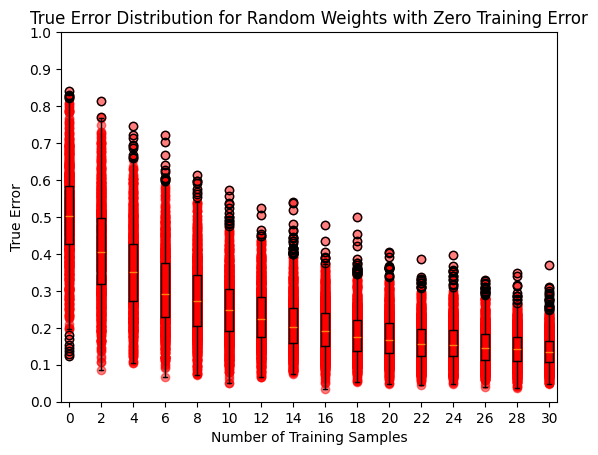

In [5]:
# -------------------------------------------------------------------
# 2) Estimate true-error distribution of ERM solutions (middle plot)
# -------------------------------------------------------------------
exp.logger.log("Estimating true error distribution for random weights with zero training error.")
solutions_true_errors = exp.estimate_true_error_distribution()
# Save numpy array of zero empirical true errors
exp.logger.save_numpy_array(np.array(solutions_true_errors, dtype=object), "solutions_true_errors.npy")
# plot boxplot of true errors for different training set sizes
boxplot_fig, _ = exp.plotter.plot_boxplot(true_errors=solutions_true_errors,
                                            n_values=exp.erm_config['n_values'],
                                            title="True Error Distribution for Random Weights with Zero Training Error",
                                            xlabel="Number of Training Samples",
                                            ylabel="True Error")
exp.logger.save_figure(boxplot_fig, "solutions_true_error_boxplot.png")
plt.figure(boxplot_fig)   # activate the figure
plt.show()

Computing DOC-based predicted mean true error and comparing with ERM empirical means.


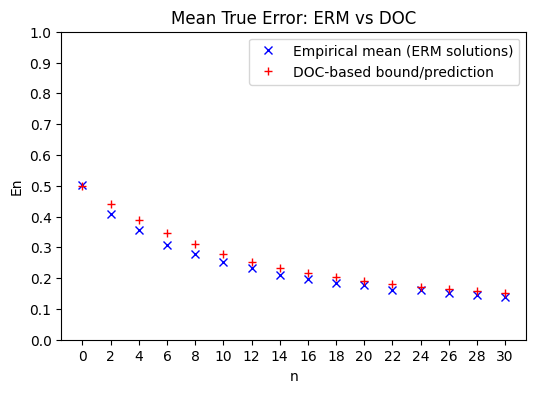

In [6]:
# -------------------------------------------------------------------
# 3) Right-column plot (red x vs blue x)
#     - red x: empirical mean of ERM true errors (from middle plot)
#     - blue x: DOC-based predicted mean computed from D(E) (left plot)
# -------------------------------------------------------------------
exp.logger.log("Computing DOC-based predicted mean true error and comparing with ERM empirical means.")
# Red crosses: empirical mean test error for each n
erm_means = np.array([float(np.mean(errs)) for errs in solutions_true_errors], dtype=float)
# Blue crosses: DOC prediction from D(E)
doc_means = exp.doc_predicted_mean_error(true_errors)
# Plot comparison (right-column figure)
doc_vs_erm_fig, ax = exp.plotter.plot_doc_vs_erm(exp.erm_config['n_values'], erm_means, doc_means)
exp.logger.save_figure(doc_vs_erm_fig, "doc_vs_erm_mean_true_error.png")

plt.figure(doc_vs_erm_fig)   # activate the figure
plt.show()